In this notebook we work with the fishing dataset found on: https://developers.google.com/earth-engine/datasets/catalog/GFW_GFF_V1_fishing_hours

Here plots are generated to try to gain an understanding of the data distribution in our region as well as the min and max values. Unfortunity this dataset was quit difficult to deal with as it was extremely large for some reason and had up to 10 datapoints on one day. So it would be extremely annoying to make calls to EE and often times we would get a runtime error. The solution to this was to take only 2 days of the week. This still took a really long time to run but at least we did not get any computational timeouts that would crash colab. 

In addition, we attempted to create some gifs that would visiualize the fishing hours for each type. Unfortunitly for this we had ran into the same error was before and when we finally got the gifs to run they all looking aweful so we decided to scrape them and go with the folium maps instead as those produced results that were alot easier to visualize and comprehend.

# **Necessary Downloads**

In [ ]:
pip install geemap

     |████████████████████████████████| 450kB 6.4MB/s 
     |████████████████████████████████| 102kB 5.6MB/s 
     |████████████████████████████████| 1.6MB 10.8MB/s 
     |████████████████████████████████| 1.2MB 26.3MB/s 
     |████████████████████████████████| 225kB 36.3MB/s 
     |████████████████████████████████| 143kB 35.3MB/s 
     |████████████████████████████████| 1.3MB 24.8MB/s 
     |████████████████████████████████| 5.1MB 37.1MB/s 
     |████████████████████████████████| 81kB 7.2MB/s 
     |████████████████████████████████| 102kB 8.3MB/s 
     |████████████████████████████████| 122kB 40.4MB/s 
     |████████████████████████████████| 378kB 37.4MB/s 
     |████████████████████████████████| 552kB 37.3MB/s 
     |████████████████████████████████| 122kB 41.0MB/s 
     |████████████████████████████████| 71kB 7.6MB/s 
     |████████████████████████████████| 71kB 6.8MB/s 
  Created wheel for pycrs: filename=PyCRS-1.0.2-cp37-none-any.whl size=32683 sha256=ca5db54023f14ce84053f4c168090

In [ ]:
!earthengine authenticate

Instructions for updating:
non-resource variables are not supported in the long term
To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code&code_challenge=3FbZYHHYFsxHAtzyVVXsDgYPO-vqOu5f4KULdTcXYtI&code_challenge_method=S256

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/1AY0e-g62MVoRp8jZNl1nzru5QS2Lg4ONzdeiDPUpZZPVJ5w_mqvj-1S_25o

Successfully saved authorization token.


In [ ]:
!pip install earthengine-api
!pip install folium

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import ee
import geemap
ee.Initialize()
from geemap import *
import matplotlib.pyplot as plt
import numpy as np

# **Getting the Geometry**

In [ ]:
#from class
import json
import numpy as np
import matplotlib.pyplot as plt
import numpy.ma as ma

# '/content/drive/My Drive/ECE471/Final_Project/map.geojson' 

jsonFile = '/content/drive/My Drive/Final_Project/map.geojson' 

with open(jsonFile, 'r') as file:
  jsonLoad = json.load(file)

geometry = jsonLoad['features'][0]['geometry']

In [ ]:
geometry

{'coordinates': [[[-75.146484375, 32.32427558887655],
   [-9.31640625, 32.32427558887655],
   [-9.31640625, 46.49839225859763],
   [-75.146484375, 46.49839225859763],
   [-75.146484375, 32.32427558887655]]],
 'type': 'Polygon'}

# **Preprocessing data**

In [ ]:
aoi = ee.Geometry(geometry)
ic_DL = ee.ImageCollection('GFW/GFF/V1/fishing_hours').filterBounds(aoi).select('drifting_longlines')
ic_FG = ee.ImageCollection('GFW/GFF/V1/fishing_hours').filterBounds(aoi).select('fixed_gear')
ic_OF = ee.ImageCollection('GFW/GFF/V1/fishing_hours').filterBounds(aoi).select('other_fishing')
ic_PS = ee.ImageCollection('GFW/GFF/V1/fishing_hours').filterBounds(aoi).select('purse_seines')
ic_SJ = ee.ImageCollection('GFW/GFF/V1/fishing_hours').filterBounds(aoi).select('squid_jigger')
ic_T = ee.ImageCollection('GFW/GFF/V1/fishing_hours').filterBounds(aoi).select('trawlers')

In [ ]:
sd_2014 = '2014-02-01'
ed_2014 = '2014-11-30'

sd_2015 = '2015-02-01'
ed_2015 = '2015-11-30'

sd_2016 = '2016-02-01'
ed_2016 = '2016-11-30'

In [ ]:
dayOfWeekFilter1 = ee.Filter.calendarRange(1, 1,"day_of_week")
dayOfWeekFilter2 = ee.Filter.calendarRange(2, 2,"day_of_week")	
dayOfWeekFilter3 = ee.Filter.calendarRange(3, 3,"day_of_week")	
dayOfWeekFilter4 = ee.Filter.calendarRange(4, 4,"day_of_week")	
dayOfWeekFilter5 = ee.Filter.calendarRange(5, 5,"day_of_week")	
dayOfWeekFilter6 = ee.Filter.calendarRange(6, 6,"day_of_week")	
dayOfWeekFilter7 = ee.Filter.calendarRange(7, 7,"day_of_week")	

In [ ]:
ic_DL2014 = ic_DL.filterDate(sd_2014, ed_2014).filter(dayOfWeekFilter3)
ic_FG2014 = ic_FG.filterDate(sd_2014, ed_2014).filter(dayOfWeekFilter3)
ic_OF2014 = ic_OF.filterDate(sd_2014, ed_2014).filter(dayOfWeekFilter3)
ic_PS2014 = ic_PS.filterDate(sd_2014, ed_2014).filter(dayOfWeekFilter3)
ic_SJ2014 = ic_SJ.filterDate(sd_2014, ed_2014).filter(dayOfWeekFilter3)
ic_T2014 = ic_T.filterDate(sd_2014, ed_2014).filter(dayOfWeekFilter3)

ic_DL2015 = ic_DL.filterDate(sd_2015, ed_2015).filter(dayOfWeekFilter3)
ic_FG2015 = ic_FG.filterDate(sd_2015, ed_2015).filter(dayOfWeekFilter3)
ic_OF2015 = ic_OF.filterDate(sd_2015, ed_2015).filter(dayOfWeekFilter3)
ic_PS2015 = ic_PS.filterDate(sd_2015, ed_2015).filter(dayOfWeekFilter3)
ic_SJ2015 = ic_SJ.filterDate(sd_2015, ed_2015).filter(dayOfWeekFilter3)
ic_T2015 = ic_T.filterDate(sd_2015, ed_2015).filter(dayOfWeekFilter3)

ic_DL2016 = ic_DL.filterDate(sd_2016, ed_2016).filter(dayOfWeekFilter3)
ic_FG2016 = ic_FG.filterDate(sd_2016, ed_2016).filter(dayOfWeekFilter3)
ic_OF2016 = ic_OF.filterDate(sd_2016, ed_2016).filter(dayOfWeekFilter3)
ic_PS2016 = ic_PS.filterDate(sd_2016, ed_2016).filter(dayOfWeekFilter3)
ic_SJ2016 = ic_SJ.filterDate(sd_2016, ed_2016).filter(dayOfWeekFilter3)
ic_T2016 = ic_T.filterDate(sd_2016, ed_2016).filter(dayOfWeekFilter3)


In [ ]:
def setProperty(image):
    dict = image.reduceRegion(ee.Reducer.max(), geometry)
    
    return image.set(dict)

#withMean = collection.map(setProperty)

In [ ]:
datasetPS1 = ee.ImageCollection('GFW/GFF/V1/fishing_hours').filter(ee.Filter.date('2016-01-01', '2016-01-31')).select('drifting_longlines').map(setProperty)
datasetPS2 = ee.ImageCollection('GFW/GFF/V1/fishing_hours').filter(ee.Filter.date('2016-02-01', '2016-02-28')).select('drifting_longlines').map(setProperty)
datasetPS3 = ee.ImageCollection('GFW/GFF/V1/fishing_hours').filter(ee.Filter.date('2016-03-01', '2016-03-31')).select('drifting_longlines').map(setProperty)
datasetPS4 = ee.ImageCollection('GFW/GFF/V1/fishing_hours').filter(ee.Filter.date('2016-04-01', '2016-04-30')).select('drifting_longlines').map(setProperty)
datasetPS5 = ee.ImageCollection('GFW/GFF/V1/fishing_hours').filter(ee.Filter.date('2016-05-01', '2016-05-31')).select('drifting_longlines').map(setProperty)
datasetPS6 = ee.ImageCollection('GFW/GFF/V1/fishing_hours').filter(ee.Filter.date('2016-06-01', '2016-06-30')).select('drifting_longlines').map(setProperty)
datasetPS7 = ee.ImageCollection('GFW/GFF/V1/fishing_hours').filter(ee.Filter.date('2016-07-01', '2016-07-31')).select('drifting_longlines').map(setProperty)
datasetPS8 = ee.ImageCollection('GFW/GFF/V1/fishing_hours').filter(ee.Filter.date('2016-08-01', '2016-08-31')).select('drifting_longlines').map(setProperty)
datasetPS9 = ee.ImageCollection('GFW/GFF/V1/fishing_hours').filter(ee.Filter.date('2016-09-01', '2016-09-30')).select('drifting_longlines').map(setProperty)
datasetPS10 = ee.ImageCollection('GFW/GFF/V1/fishing_hours').filter(ee.Filter.date('2016-10-01', '2016-10-31')).select('drifting_longlines').map(setProperty)
datasetPS11 = ee.ImageCollection('GFW/GFF/V1/fishing_hours').filter(ee.Filter.date('2016-11-01', '2016-11-30')).select('drifting_longlines').map(setProperty)
datasetPS12 = ee.ImageCollection('GFW/GFF/V1/fishing_hours').filter(ee.Filter.date('2016-12-01', '2016-12-31')).select('drifting_longlines').map(setProperty)

In [ ]:
gif1 = ee.ImageCollection('GFW/GFF/V1/fishing_hours').filter(ee.Filter.date('2016-01-01', '2016-06-30')).select('drifting_longlines').map(setProperty)
gif2 = ic_FG.filterDate(sd_2014, ed_2016).filter(dayOfWeekFilter3).map(setProperty)
gif3 = ic_OF.filterDate(sd_2014, ed_2016).filter(dayOfWeekFilter3).map(setProperty)
gif4 = ic_PS.filterDate(sd_2014, ed_2016).filter(dayOfWeekFilter3).map(setProperty)
gif5 = ic_SJ.filterDate(sd_2014, ed_2016).filter(dayOfWeekFilter3).map(setProperty)
gif6 = ic_T.filterDate(sd_2014, ed_2016).filter(dayOfWeekFilter3).map(setProperty)

In [ ]:
mean_spatial_2014_DL = ic_DL2014.map(setProperty)
mean_spatial_2014_FG = ic_FG2014.map(setProperty)
mean_spatial_2014_OF = ic_OF2014.map(setProperty)
mean_spatial_2014_PS = ic_PS2014.map(setProperty)
mean_spatial_2014_SJ = ic_SJ2014.map(setProperty)
mean_spatial_2014_T = ic_T2014.map(setProperty)

mean_spatial_2015_DL = ic_DL2015.map(setProperty)
mean_spatial_2015_FG = ic_FG2015.map(setProperty)
mean_spatial_2015_OF = ic_OF2015.map(setProperty)
mean_spatial_2015_PS = ic_PS2015.map(setProperty)
mean_spatial_2015_SJ = ic_SJ2015.map(setProperty)
mean_spatial_2015_T = ic_T2015.map(setProperty)

mean_spatial_2016_DL = ic_DL2016.map(setProperty)
mean_spatial_2016_FG = ic_FG2016.map(setProperty)
mean_spatial_2016_OF = ic_OF2016.map(setProperty)
mean_spatial_2016_PS = ic_PS2016.map(setProperty)
mean_spatial_2016_SJ = ic_SJ2016.map(setProperty)
mean_spatial_2016_T = ic_T2016.map(setProperty)

In [ ]:
mean_spatial_2014_DL.size().getInfo()

1763

In [ ]:
DL_2016 = mean_spatial_2016_DL.aggregate_array('drifting_longlines').getInfo()

In [ ]:
DL_2014_wd = mean_spatial_2014_DL.aggregate_array('drifting_longlines').getInfo()
FG_2014_wd = mean_spatial_2014_FG.aggregate_array('fixed_gear').getInfo()
OF_2014_wd = mean_spatial_2014_OF.aggregate_array('other_fishing').getInfo()
PS_2014_wd = mean_spatial_2014_PS.aggregate_array('purse_seines').getInfo()
SJ_2014_wd = mean_spatial_2014_SJ.aggregate_array('squid_jigger').getInfo()
T_2014_wd = mean_spatial_2014_T.aggregate_array('trawlers').getInfo()

DL_2015_wd = mean_spatial_2015_DL.aggregate_array('drifting_longlines').getInfo()
FG_2015_wd = mean_spatial_2015_FG.aggregate_array('fixed_gear').getInfo()
OF_2015_wd = mean_spatial_2015_OF.aggregate_array('other_fishing').getInfo()
PS_2015_wd = mean_spatial_2015_PS.aggregate_array('purse_seines').getInfo()
SJ_2015_wd = mean_spatial_2015_SJ.aggregate_array('squid_jigger').getInfo()
T_2015_wd = mean_spatial_2015_T.aggregate_array('trawlers').getInfo()

DL_2016_wd = mean_spatial_2016_DL.aggregate_array('drifting_longlines').getInfo()
FG_2016_wd = mean_spatial_2016_FG.aggregate_array('fixed_gear').getInfo()
OF_2016_wd = mean_spatial_2016_OF.aggregate_array('other_fishing').getInfo()
PS_2016_wd = mean_spatial_2016_PS.aggregate_array('purse_seines').getInfo()
SJ_2016_wd = mean_spatial_2016_SJ.aggregate_array('squid_jigger').getInfo()
T_2016_wd = mean_spatial_2016_T.aggregate_array('trawlers').getInfo()

In [ ]:
len(DL_2016_wd)

1763

In [ ]:
months = ['Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov']
xlabel = []
for i in range(0, len(months)):
  for _ in range (0, 176):
    xlabel.append(months[i])

xlabel.append(months[-1])
xlabel.append(months[-1])
xlabel.append(months[-1])

In [ ]:
len(xlabel)

1763

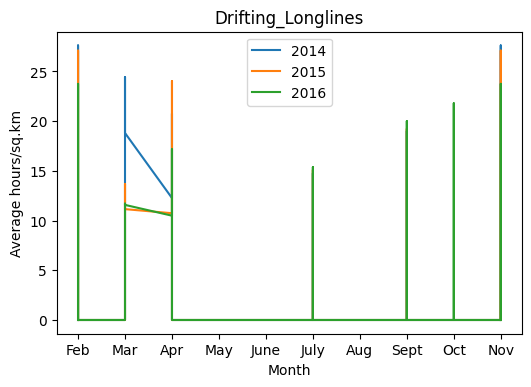

In [ ]:
plt.figure(dpi=100)
plt.plot(xlabel, DL_2014_wd)
plt.plot(xlabel, DL_2015_wd)
plt.plot(xlabel, DL_2016_wd)
plt.legend(['2014', '2015', '2016'])
plt.xlabel('Month')
plt.ylabel('Average hours/sq.km')
plt.title('Drifting_Longlines')
plt.show()

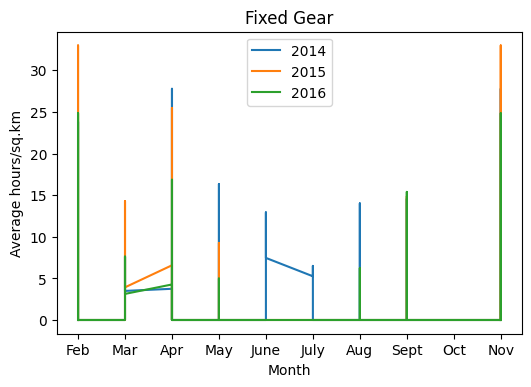

In [ ]:
plt.figure(dpi=100)
plt.plot(xlabel, FG_2014_wd)
plt.plot(xlabel, FG_2015_wd)
plt.plot(xlabel, FG_2016_wd)
plt.legend(['2014', '2015', '2016'])
plt.xlabel('Month')
plt.ylabel('Average hours/sq.km')
plt.title('Fixed Gear')
plt.show()

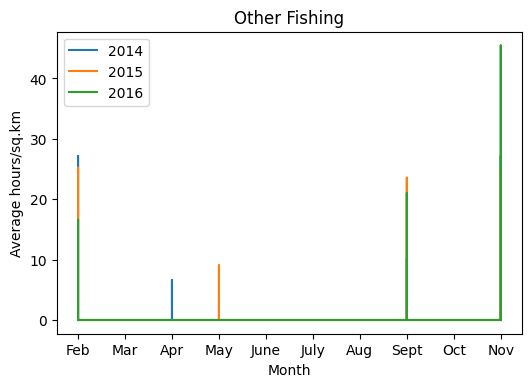

In [ ]:
plt.figure(dpi=100)
plt.plot(xlabel, OF_2014_wd)
plt.plot(xlabel, OF_2015_wd)
plt.plot(xlabel, OF_2016_wd)
plt.legend(['2014', '2015', '2016'])
plt.xlabel('Month')
plt.ylabel('Average hours/sq.km')
plt.title('Other Fishing')
plt.show()

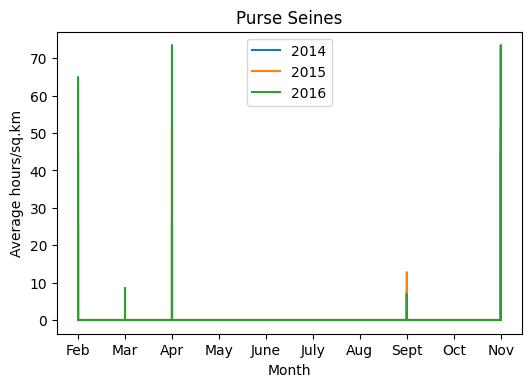

In [ ]:
plt.figure(dpi=100)
plt.plot(xlabel, PS_2014_wd)
plt.plot(xlabel, PS_2015_wd)
plt.plot(xlabel, PS_2016_wd)
plt.legend(['2014', '2015', '2016'])
plt.xlabel('Month')
plt.ylabel('Average hours/sq.km')
plt.title('Purse Seines')
plt.show()

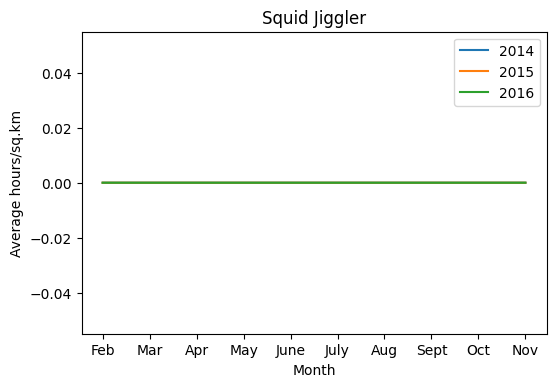

In [ ]:
plt.figure(dpi=100)
plt.plot(xlabel, SJ_2014_wd)
plt.plot(xlabel, SJ_2015_wd)
plt.plot(xlabel, SJ_2016_wd)
plt.legend(['2014', '2015', '2016'])
plt.xlabel('Month')
plt.ylabel('Average hours/sq.km')
plt.title('Squid Jiggler')
plt.show()

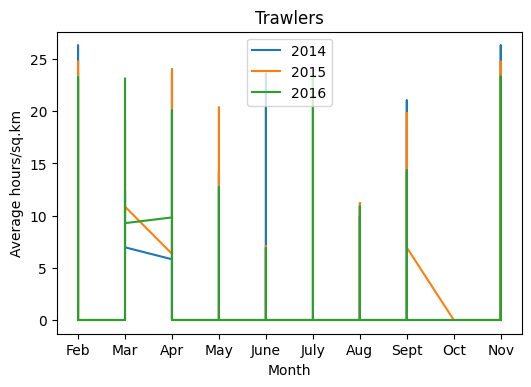

In [ ]:
plt.figure(dpi=100)
plt.plot(xlabel, T_2014_wd)
plt.plot(xlabel, T_2015_wd)
plt.plot(xlabel, T_2016_wd)
plt.legend(['2014', '2015', '2016'])
plt.xlabel('Month')
plt.ylabel('Average hours/sq.km')
plt.title('Trawlers')
plt.show()

In [ ]:
DL_2014_wd = np.array(DL_2014_wd)
FG_2014_wd = np.array(FG_2014_wd)
OF_2014_wd = np.array(OF_2014_wd)
PS_2014_wd = np.array(PS_2014_wd)
SJ_2014_wd = np.array(SJ_2014_wd)
T_2014_wd = np.array(T_2014_wd)

DL_2015_wd = np.array(DL_2015_wd)
FG_2015_wd = np.array(FG_2015_wd)
OF_2015_wd = np.array(OF_2015_wd)
PS_2015_wd = np.array(PS_2015_wd)
SJ_2015_wd = np.array(SJ_2015_wd)
T_2015_wd = np.array(T_2015_wd)

DL_2016_wd = np.array(DL_2016_wd)
FG_2016_wd = np.array(FG_2016_wd)
OF_2016_wd = np.array(OF_2016_wd)
PS_2016_wd = np.array(PS_2016_wd)
SJ_2016_wd = np.array(SJ_2016_wd)
T_2016_wd = np.array(T_2016_wd)

In [ ]:
total2014_wd = DL_2014_wd + FG_2014_wd + OF_2014_wd + PS_2014_wd + SJ_2014_wd + T_2014_wd

total2015_wd = DL_2015_wd + FG_2015_wd + OF_2015_wd + PS_2015_wd + SJ_2015_wd + T_2015_wd

total2016_wd = DL_2016_wd + FG_2016_wd + OF_2016_wd + PS_2016_wd + SJ_2016_wd + T_2016_wd

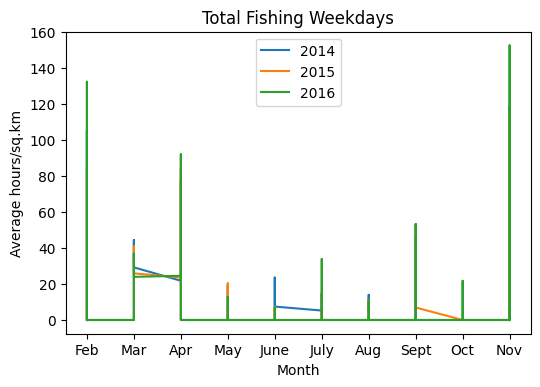

In [ ]:
plt.figure(dpi=100)
plt.plot(xlabel, total2014_wd)
plt.plot(xlabel, total2015_wd)
plt.plot(xlabel, total2016_wd)
plt.legend(['2014', '2015', '2016'])
plt.xlabel('Month')
plt.ylabel('Average hours/sq.km')
plt.title('Total Fishing Weekdays')
plt.show()

# **Weekend Data**

In [ ]:
ic_DL2014 = ic_DL.filterDate(sd_2014, ed_2014).filter(dayOfWeekFilter7)
ic_FG2014 = ic_FG.filterDate(sd_2014, ed_2014).filter(dayOfWeekFilter7)
ic_OF2014 = ic_OF.filterDate(sd_2014, ed_2014).filter(dayOfWeekFilter7)
ic_PS2014 = ic_PS.filterDate(sd_2014, ed_2014).filter(dayOfWeekFilter7)
ic_SJ2014 = ic_SJ.filterDate(sd_2014, ed_2014).filter(dayOfWeekFilter7)
ic_T2014 = ic_T.filterDate(sd_2014, ed_2014).filter(dayOfWeekFilter7)

ic_DL2015 = ic_DL.filterDate(sd_2015, ed_2015).filter(dayOfWeekFilter7)
ic_FG2015 = ic_FG.filterDate(sd_2015, ed_2015).filter(dayOfWeekFilter7)
ic_OF2015 = ic_OF.filterDate(sd_2015, ed_2015).filter(dayOfWeekFilter7)
ic_PS2015 = ic_PS.filterDate(sd_2015, ed_2015).filter(dayOfWeekFilter7)
ic_SJ2015 = ic_SJ.filterDate(sd_2015, ed_2015).filter(dayOfWeekFilter7)
ic_T2015 = ic_T.filterDate(sd_2015, ed_2015).filter(dayOfWeekFilter7)

ic_DL2016 = ic_DL.filterDate(sd_2016, ed_2016).filter(dayOfWeekFilter7)
ic_FG2016 = ic_FG.filterDate(sd_2016, ed_2016).filter(dayOfWeekFilter7)
ic_OF2016 = ic_OF.filterDate(sd_2016, ed_2016).filter(dayOfWeekFilter7)
ic_PS2016 = ic_PS.filterDate(sd_2016, ed_2016).filter(dayOfWeekFilter7)
ic_SJ2016 = ic_SJ.filterDate(sd_2016, ed_2016).filter(dayOfWeekFilter7)
ic_T2016 = ic_T.filterDate(sd_2016, ed_2016).filter(dayOfWeekFilter7)

In [ ]:
mean_spatial_2014_DL = ic_DL2014.map(setProperty)
mean_spatial_2014_FG = ic_FG2014.map(setProperty)
mean_spatial_2014_OF = ic_OF2014.map(setProperty)
mean_spatial_2014_PS = ic_PS2014.map(setProperty)
mean_spatial_2014_SJ = ic_SJ2014.map(setProperty)
mean_spatial_2014_T = ic_T2014.map(setProperty)

mean_spatial_2015_DL = ic_DL2015.map(setProperty)
mean_spatial_2015_FG = ic_FG2015.map(setProperty)
mean_spatial_2015_OF = ic_OF2015.map(setProperty)
mean_spatial_2015_PS = ic_PS2015.map(setProperty)
mean_spatial_2015_SJ = ic_SJ2015.map(setProperty)
mean_spatial_2015_T = ic_T2015.map(setProperty)

mean_spatial_2016_DL = ic_DL2016.map(setProperty)
mean_spatial_2016_FG = ic_FG2016.map(setProperty)
mean_spatial_2016_OF = ic_OF2016.map(setProperty)
mean_spatial_2016_PS = ic_PS2016.map(setProperty)
mean_spatial_2016_SJ = ic_SJ2016.map(setProperty)
mean_spatial_2016_T = ic_T2016.map(setProperty)

In [ ]:
mean_spatial_2016_DL.size().getInfo()

1763

In [ ]:
len(DL_2016_we)

1763

In [ ]:
DL_2014_we = mean_spatial_2014_DL.aggregate_array('drifting_longlines').getInfo()
FG_2014_we = mean_spatial_2014_FG.aggregate_array('fixed_gear').getInfo()
OF_2014_we = mean_spatial_2014_OF.aggregate_array('other_fishing').getInfo()
PS_2014_we = mean_spatial_2014_PS.aggregate_array('purse_seines').getInfo()
SJ_2014_we = mean_spatial_2014_SJ.aggregate_array('squid_jigger').getInfo()
T_2014_we = mean_spatial_2014_T.aggregate_array('trawlers').getInfo()

DL_2015_we = mean_spatial_2015_DL.aggregate_array('drifting_longlines').getInfo()
FG_2015_we = mean_spatial_2015_FG.aggregate_array('fixed_gear').getInfo()
OF_2015_we = mean_spatial_2015_OF.aggregate_array('other_fishing').getInfo()
PS_2015_we = mean_spatial_2015_PS.aggregate_array('purse_seines').getInfo()
SJ_2015_we = mean_spatial_2015_SJ.aggregate_array('squid_jigger').getInfo()
T_2015_we = mean_spatial_2015_T.aggregate_array('trawlers').getInfo()

DL_2016_we = mean_spatial_2016_DL.aggregate_array('drifting_longlines').getInfo()
FG_2016_we = mean_spatial_2016_FG.aggregate_array('fixed_gear').getInfo()
OF_2016_we = mean_spatial_2016_OF.aggregate_array('other_fishing').getInfo()
PS_2016_we = mean_spatial_2016_PS.aggregate_array('purse_seines').getInfo()
SJ_2016_we = mean_spatial_2016_SJ.aggregate_array('squid_jigger').getInfo()
T_2016_we = mean_spatial_2016_T.aggregate_array('trawlers').getInfo()

In [ ]:
DL_2015_we = DL_2015_we[:1763]
FG_2015_we = FG_2015_we[:1763]
OF_2015_we = OF_2015_we[:1763]
PS_2015_we = PS_2015_we[:1763]
SJ_2015_we = SJ_2015_we[:1763]
T_2015_we = T_2015_we[:1763]


In [ ]:
months = ['Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov']
xlabel = []
for i in range(0, len(months)):
  for _ in range (0, 176):
    xlabel.append(months[i])

xlabel.append(months[-1])
xlabel.append(months[-1])
xlabel.append(months[-1])


In [ ]:
len(xlabel)

1763

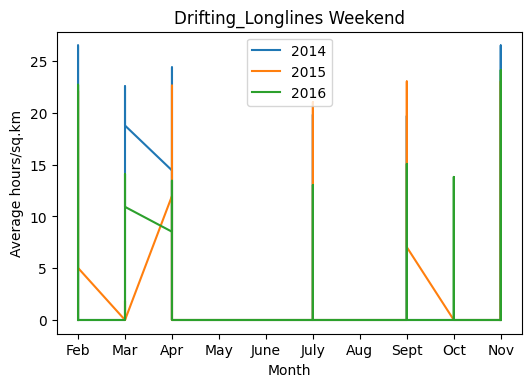

In [ ]:
plt.figure(dpi=100)
plt.plot(xlabel, DL_2014_we)
plt.plot(xlabel, DL_2015_we)
plt.plot(xlabel, DL_2016_we)
plt.legend(['2014', '2015', '2016'])
plt.xlabel('Month')
plt.ylabel('Average hours/sq.km')
plt.title('Drifting_Longlines Weekend')
plt.show()

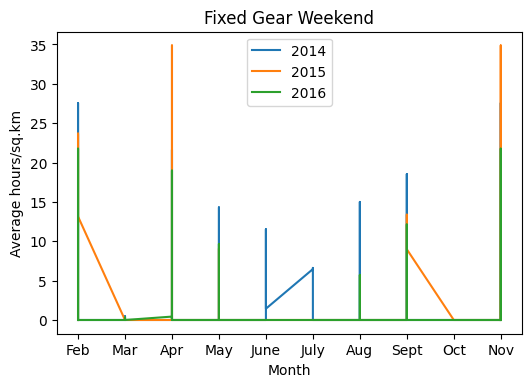

In [ ]:
plt.figure(dpi=100)
plt.plot(xlabel, FG_2014_we)
plt.plot(xlabel, FG_2015_we)
plt.plot(xlabel, FG_2016_we)
plt.legend(['2014', '2015', '2016'])
plt.xlabel('Month')
plt.ylabel('Average hours/sq.km')
plt.title('Fixed Gear Weekend')
plt.show()

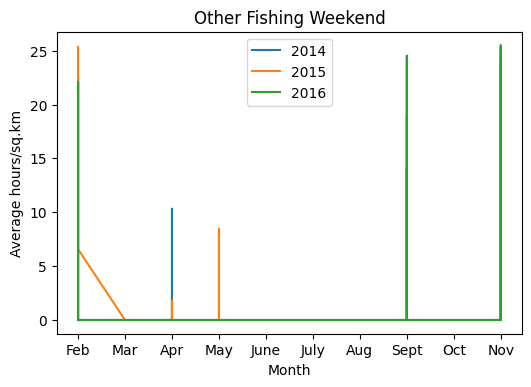

In [ ]:
plt.figure(dpi=100)
plt.plot(xlabel, OF_2014_we)
plt.plot(xlabel, OF_2015_we)
plt.plot(xlabel, OF_2016_we)
plt.legend(['2014', '2015', '2016'])
plt.xlabel('Month')
plt.ylabel('Average hours/sq.km')
plt.title('Other Fishing Weekend')
plt.show()

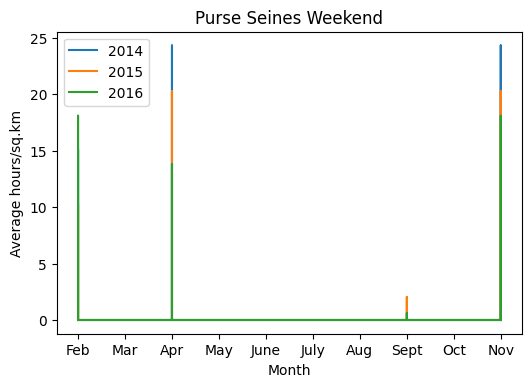

In [ ]:
plt.figure(dpi=100)
plt.plot(xlabel, PS_2014_we)
plt.plot(xlabel, PS_2015_we)
plt.plot(xlabel, PS_2016_we)
plt.legend(['2014', '2015', '2016'])
plt.xlabel('Month')
plt.ylabel('Average hours/sq.km')
plt.title('Purse Seines Weekend')
plt.show()

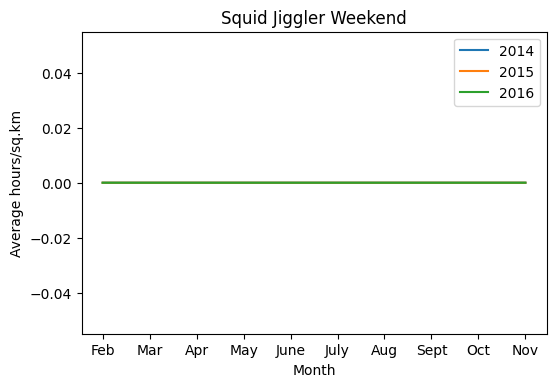

In [ ]:
plt.figure(dpi=100)
plt.plot(xlabel, SJ_2014_we)
plt.plot(xlabel, SJ_2015_we)
plt.plot(xlabel, SJ_2016_we)
plt.legend(['2014', '2015', '2016'])
plt.xlabel('Month')
plt.ylabel('Average hours/sq.km')
plt.title('Squid Jiggler Weekend')
plt.show()

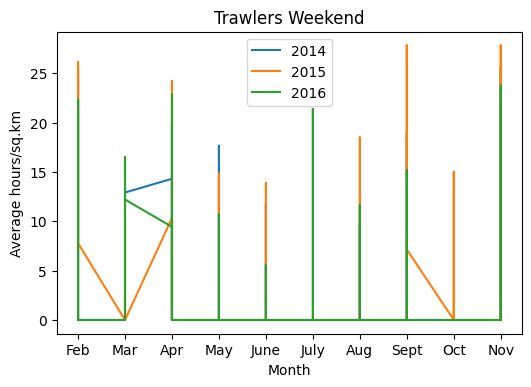

In [ ]:
plt.figure(dpi=100)
plt.plot(xlabel, T_2014_we)
plt.plot(xlabel, T_2015_we)
plt.plot(xlabel, T_2016_we)
plt.legend(['2014', '2015', '2016'])
plt.xlabel('Month')
plt.ylabel('Average hours/sq.km')
plt.title('Trawlers Weekend')
plt.show()

In [ ]:
DL_2014_we = np.array(DL_2014_we)
FG_2014_we = np.array(FG_2014_we)
OF_2014_we = np.array(OF_2014_we)
PS_2014_we = np.array(PS_2014_we)
SJ_2014_we = np.array(SJ_2014_we)
T_2014_we = np.array(T_2014_we)

DL_2015_we = np.array(DL_2015_we)
FG_2015_we = np.array(FG_2015_we)
OF_2015_we = np.array(OF_2015_we)
PS_2015_we = np.array(PS_2015_we)
SJ_2015_we = np.array(SJ_2015_we)
T_2015_we = np.array(T_2015_we)

DL_2016_we = np.array(DL_2016_we)
FG_2016_we = np.array(FG_2016_we)
OF_2016_we = np.array(OF_2016_we)
PS_2016_we = np.array(PS_2016_we)
SJ_2016_we = np.array(SJ_2016_we)
T_2016_we = np.array(T_2016_we)

In [ ]:
total2014_we = DL_2014_we + FG_2014_we + OF_2014_we + PS_2014_we + SJ_2014_we + T_2014_we
total2015_we = DL_2015_we + FG_2015_we + OF_2015_we + PS_2015_we + SJ_2015_we + T_2015_we
total2016_we = DL_2016_we + FG_2016_we + OF_2016_we + PS_2016_we + SJ_2016_we + T_2016_we

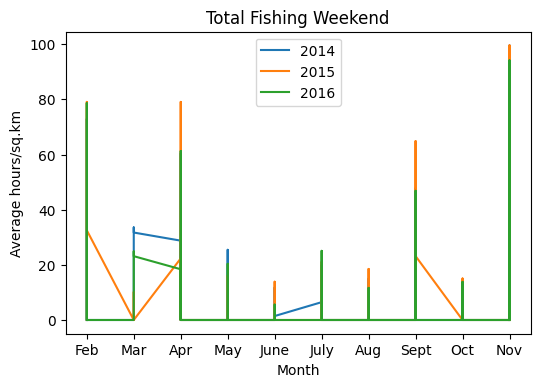

In [ ]:
plt.figure(dpi=100)
plt.plot(xlabel, total2014_we)
plt.plot(xlabel, total2015_we)
plt.plot(xlabel, total2016_we)
plt.legend(['2014', '2015', '2016'])
plt.xlabel('Month')
plt.ylabel('Average hours/sq.km')
plt.title('Total Fishing Weekend')
plt.show()

# **Gif Generation**

In [ ]:
# video_args = {
#   'dimensions': 100,
#   'region': aoi,
#   'framesPerSecond': 10,
#   # 'crs': 'EPSG:3',
#   'min': 0,
#   'max': 10.0,
#   'palette': [
#     '040274', '040281', '0502a3', '0502b8', '0502ce', '0502e6',
#     '0602ff', '235cb1', '307ef3', '269db1', '30c8e2', '32d3ef',
#     '3be285', '3ff38f', '86e26f', '3ae237', 'b5e22e', 'd6e21f',
#     'fff705', 'ffd611', 'ffb613', 'ff8b13', 'ff6e08', 'ff500d',
#     'ff0000', 'de0101', 'c21301', 'a71001', '911003'
#   ],
# }

video_args = {
  'dimensions': 100,
  'min': 0.0,
  'max': 10.0,
  'region': aoi,
  'framesPerSecond': 60,
  "palette": ['8ab4f8', 'FF0000'],
  # "opacity": 0.7
}

gif1_url=gif1.getVideoThumbURL(video_args)
# gif2_url=gif2.getVideoThumbURL(video_args)
# gif3_url=gif3.getVideoThumbURL(video_args)



In [ ]:
gif4_url=gif4.getVideoThumbURL(video_args)
gif5_url=gif5.getVideoThumbURL(video_args)
gif6_url=gif6.getVideoThumbURL(video_args)

In [ ]:
gif1_url  

'https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/videoThumbnails/3f6d32b6f28fc6e2ccda38810e011fc5-21b91bb8e7d4b5f13e8e08d33241e15a:getPixels'

In [ ]:
gif2_url

In [ ]:
gif3_url

In [ ]:
gif4_url

In [ ]:
gif5_url

In [ ]:
gif6_url

In [ ]:
import urllib.request
gif1_name = '/content/drive/My Drive/Final_Project/gifs/driftinglonglines1year.gif' # <-- Need to define
urllib.request.urlretrieve(gif1_url, gif1_name)

NameError: ignored

In [ ]:
import os
in_gif1 = os.path.abspath(gif1_name)
out_gif1 = os.path.join(os.path.expanduser('~'),'Downloads/outgif1.gif')

In [ ]:
text = [];
# text2 = [];
for _ in range(0, 3):
  for i in range (0, len(months)):
    if('Dec' == months[i]):
      text.append(months[i])
    for _ in range(0,30):
      text.append(months[i])

# text.append(months[i])
# for i in range(0, len(year)):
#   for _ in range (0, 362):
#     text2.append(year[i])

text = text[:1084]
# text2 = text2[:1084]

In [ ]:
len(text)

1084

In [ ]:
# text = [str(n).zfill(2) + ":00" for n in range(0, 72)]

geemap.add_text_to_gif(in_gif1, out_gif1, xy=('5%', '5%'), text_sequence=text, font_size=15, font_color='white', duration=100)
geemap.add_text_to_gif(out_gif1, out_gif1, xy=('5%', '25%'), text_sequence=text2, font_size=15, font_color='white', duration=100)

geemap.add_text_to_gif(out_gif1, out_gif1, xy=('20%', '5%'), text_sequence="Drifting LongLines",  font_size = 20, font_color='white')


In [ ]:
width = 250
height = 10
palette = ['blue', 'cyan', 'yellow', 'red']
labels = [-400, 350]
colorbar = create_colorbar(width=width, height=height, palette=palette, vertical=False,
                    add_labels=True, font_size=20, labels=labels)

In [ ]:
add_image_to_gif(out_gif, out_gif, in_image=colorbar, xy = ('39%', '79%'), image_size=(200, 200))

# geemap.show_image(colorbar)


In [ ]:
geemap.show_image(out_gif)


Output()